# Decision Tree/Regression Trees

**Decision Trees** are a popular machine learning algorithm used for both classification and regression tasks. They are simple yet powerful models that mimic human decision-making processes by dividing data into distinct segments based on specific criteria. These criteria are determined through a series of binary decisions at each node of the tree, leading to a tree-like structure. Decision Trees are easy to understand and interpret, making them valuable for explaining the reasoning behind a model's predictions.

One key advantage of Decision Trees is their ability to handle both categorical and numerical features, making them versatile for various types of data. They can be used for tasks such as diagnosing medical conditions, customer churn prediction, and even game strategy optimization.

However, Decision Trees are prone to overfitting when they become overly complex. To mitigate this, techniques like pruning and setting appropriate hyperparameters are employed. Additionally, they may not perform as well as more advanced algorithms on complex datasets with intricate relationships.

Decision Trees are intuitive and interpretable models that are widely used in machine learning, especially when transparency and explainability are essential in decision-making processes.


Decision trees are constructed from only two elements — nodes and branches.

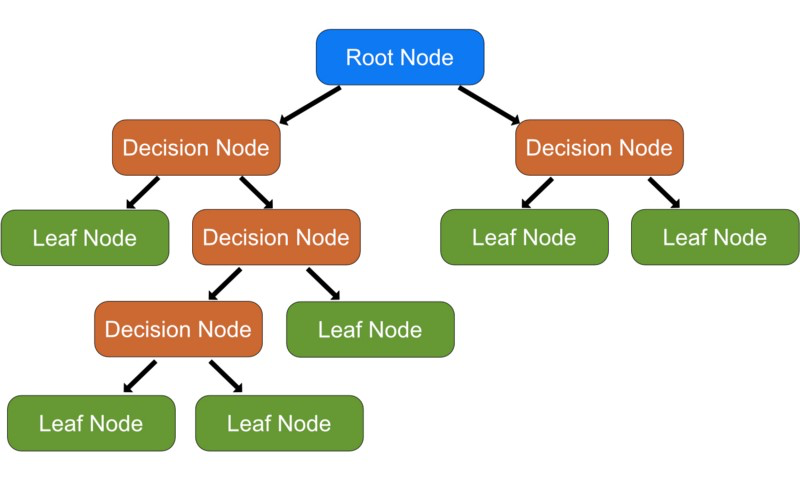

## Algorithm


- **Initialization**: Start with the entire dataset at the root node.
- **Attribute Selection**: Select the best attribute (feature) to split the data at the current node. Common criteria include Information Gain, Gini Impurity, or Mean Squared Error.
- **Splitting**: Divide the dataset into subsets based on the chosen attribute's values.
- **Recursive Process**: Recursively apply the attribute selection and splitting steps to create a tree-like structure.
- **Stopping Criteria**: Determine when to stop the splitting process, typically based on factors like maximum depth, minimum samples per leaf, or purity threshold.
- **Leaf Nodes**: Assign a class label or regression value to the leaf nodes based on the majority class or mean value of the samples in that leaf.



## Advantages and Disadvantages of the Model

**Advantages of Decision Trees :**

- **Interpretability**: Decision Trees are highly interpretable, making them suitable for explaining model predictions to non-technical stakeholders.
- **Handling Mixed Data**: They can handle both categorical and numerical features, making them versatile for various types of datasets.
- **No Data Normalization**: Decision Trees do not require data normalization or scaling, simplifying preprocessing.
- **White Box Model**: They provide a transparent view of the decision-making process, allowing users to follow the logic of the model.

**Disadvantages of Decision Trees :**

- **Overfitting**: Decision Trees are prone to overfitting, especially when they become too deep or complex.
- **High Variance**: They can be sensitive to small variations in the training data, leading to different trees.
- **Biased to Dominant Classes**: In classification tasks with imbalanced classes, Decision Trees tend to favor the majority class.
- **Limited Expressiveness**: For complex relationships in data, Decision Trees may not perform as well as more advanced models like Random Forests or Gradient Boosting.


## Dataset

-For the Decision Tree **Classification part**, we will be working with the "Wine Quality Dataset." This dataset is a popular choice in machine learning for exploring classification and regression tasks, making it an excellent option for our project.

**Dataset Details:**

- **Data Source**: The dataset is loaded from the Wine dataset available in popular machine learning libraries like scikit-learn.
- **Objective**: The dataset is often used for classification tasks where the goal is to predict the quality rating of different wines based on various features.
- **Features**: The dataset includes a variety of chemical and sensory attributes of wines, such as acidity, pH level, alcohol content, and more.
- **Target Variable**: The target variable is typically the quality rating of the wines, which is a numerical value.


## Implementation

### Decision Tree for Classification
We want to classify houses as either 'high-priced' or 'low-priced' based on a threshold value for the 'price'

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


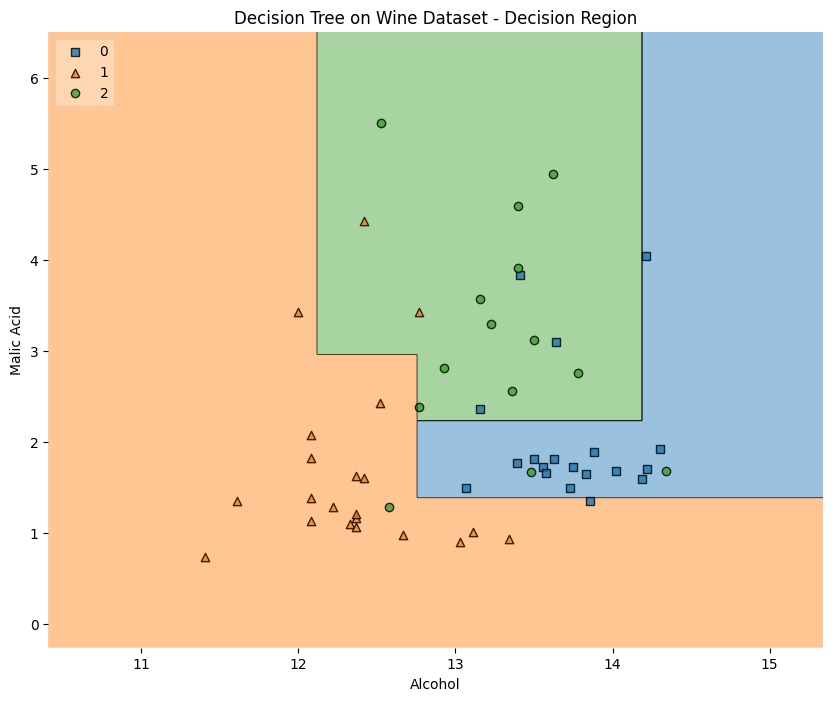

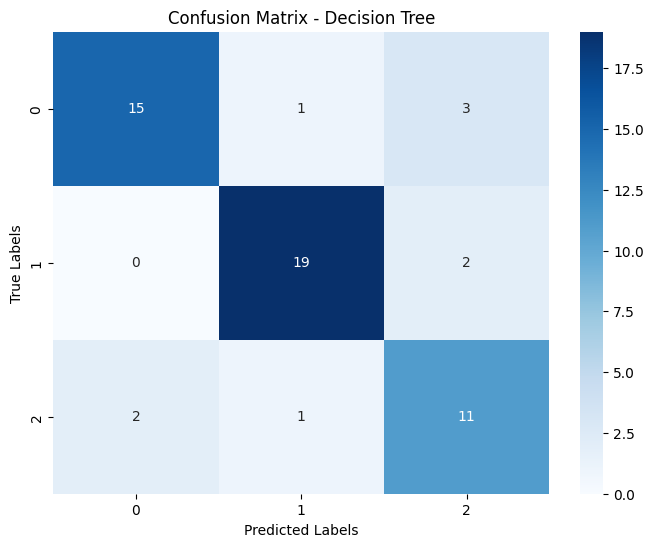

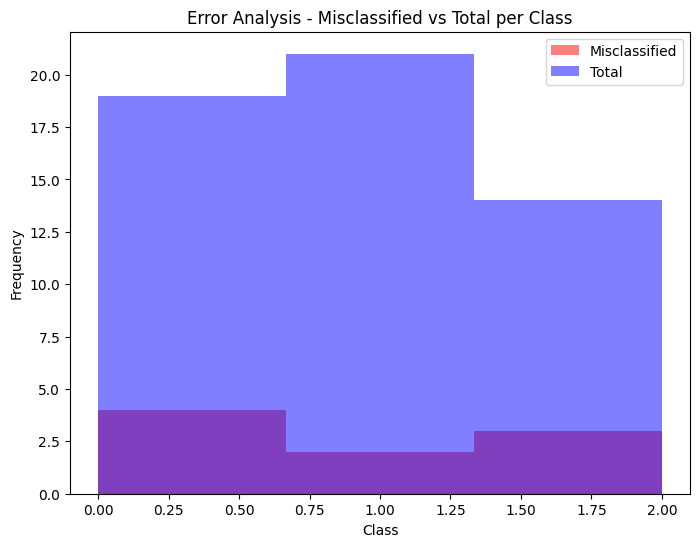

Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.90      0.90      0.90        21
           2       0.69      0.79      0.73        14

    accuracy                           0.83        54
   macro avg       0.82      0.83      0.82        54
weighted avg       0.84      0.83      0.84        54



In [9]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

# Load dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# For decision region plot, we need only two features, here we are taking the first two for simplicity
X = X.iloc[:, :2]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Decision region plot
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test.values, y_test.values, clf=dt_classifier, legend=2)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Decision Tree on Wine Dataset - Decision Region')
plt.show()

# Confusion Matrix plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()

# Error Analysis
errors = (y_pred != y_test)
error_rate = errors.sum() / errors.size * 100
plt.figure(figsize=(8, 6))
plt.hist(y_test[errors], bins=len(data.target_names), alpha=0.5, color='red', label='Misclassified')
plt.hist(y_test, bins=len(data.target_names), alpha=0.5, color='blue', label='Total')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Error Analysis - Misclassified vs Total per Class')
plt.legend()
plt.show()

# Print accuracy and classification report
print(f'Accuracy: {accuracy}\n')
print('Classification Report:\n', class_report)

## Interpretation of Decision Tree Classifier Results

The decision tree classifier was applied to predict the quality of wines categorized into three classes. The model's performance was evaluated using various metrics, and the results are as follows:

### Performance Metrics

- **Accuracy:** 0.8333  
    The model accurately predicted the quality of the wines 83.33% of the time. This high accuracy indicates that the model is effective in distinguishing between the different quality classes of wine.

- **Precision, Recall, and F1-Score:**  
    - **Class 0 (Low Quality):** Precision of 0.88 and recall of 0.79, resulting in an F1-score of 0.83. This suggests that the model is quite reliable in identifying low-quality wines, with a low false positive rate.
    - **Class 1 (Medium Quality):** Both precision and recall are 0.90, yielding an F1-score of 0.90. The model shows high precision and recall for medium quality wines, indicating balanced performance in correctly identifying and not missing this class.
    - **Class 2 (High Quality):** Precision of 0.69 and recall of 0.79, with an F1-score of 0.73. For high-quality wines, the model has a moderate false positive rate but a better rate of identifying true positives.

### Conclusion

Overall, the decision tree classifier shows a strong ability to classify wines into their respective quality categories. It performs particularly well for medium quality wines. The somewhat lower precision for high-quality wines suggests that the model occasionally misclassifies wines of other qualities as high quality. Future work could focus on feature selection or model tuning to further improve the precision for high-quality wines, potentially enhancing the overall model performance.


### Performance Metrics

In our project, we will evaluate the performance of our classification models using several key metrics.

First and foremost, **"Accuracy"** measures the proportion of correctly classified instances over the total number of instances.

Additionally, the **"Classification Report"** provides a comprehensive summary of various classification metrics, including precision, recall, and F1 Score, for each class in the dataset.

The **"F1 Score"** is a metric that balances precision and recall, providing a single value that combines both aspects of a classifier's performance.

Furthermore, we will utilize the **"Confusion Matrix"** to gain insights into true positives, true negatives, false positives, and false negatives, allowing us to calculate precision, recall, and F1 Score individually for each class.

These metrics will guide us in assessing the effectiveness of our classification models and making informed decisions.


## Regression Tree

The Regression Tree model is a powerful algorithm used in supervised machine learning for predicting continuous numerical values.

Unlike classification trees that predict discrete classes, Regression Trees are tailored for regression tasks, making them well-suited for scenarios where the target variable is continuous.

These trees recursively split the dataset into subsets based on the feature that optimally reduces the variance of the target variable within each subset. The final result is a tree-like structure where leaf nodes contain predicted numerical values.

 Regression Trees are known for their simplicity and interpretability, making them valuable tools for understanding the relationships between input features and continuous outcomes in various domains, such as finance, real estate, and healthcare.


#### Dataset

-For our Decision Tree **Regression project**, we will be working with the "Housing Dataset." This dataset contains valuable information about various aspects of houses, making it an ideal choice for exploring predictive modeling using Decision Trees and Regression Trees.

**Dataset Details:**

- **Price**: The price of the houses, categorized into different price ranges.
- **Area**: The area of the houses, also categorized into distinct ranges.
- **Bedrooms**: The number of bedrooms in each house.
- **Bathrooms**: The number of bathrooms in each house.
- **Stories**: The number of stories each house has.
- **Main Road**: A binary variable indicating whether the house is connected to the main road.
- **Guest Room**: A binary variable indicating whether the house has a guest room.
- **Basement**: A binary variable indicating whether the house has a basement.
- **Hot Water Heating**: A binary variable indicating whether the house has a hot water heating system.
- **Air Conditioning**: A binary variable indicating whether the house has an air conditioning system.
- **Parking**: The number of parking spaces available for each house.
- **Prefarea**: A binary variable indicating the preferred area of the house.
- **Furnishing Status**: The furnishing status of the house, categorized as "semi-furnished," "unfurnished," or "other."

**Price and Area Labels:**
- The "Price" column is categorized into different price ranges.
- The "Area" column is categorized into distinct ranges.

These datasets provide valuable insights into the factors affecting house prices and are well-suited for training and evaluating Decision Trees and Regression Trees. We look forward to exploring and analyzing this dataset in our project.


**We'll predict the actual 'price' of the houses.**





Best Parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 12}
Mean Squared Error: 2479984082435.897
R-squared: 0.424115469228301


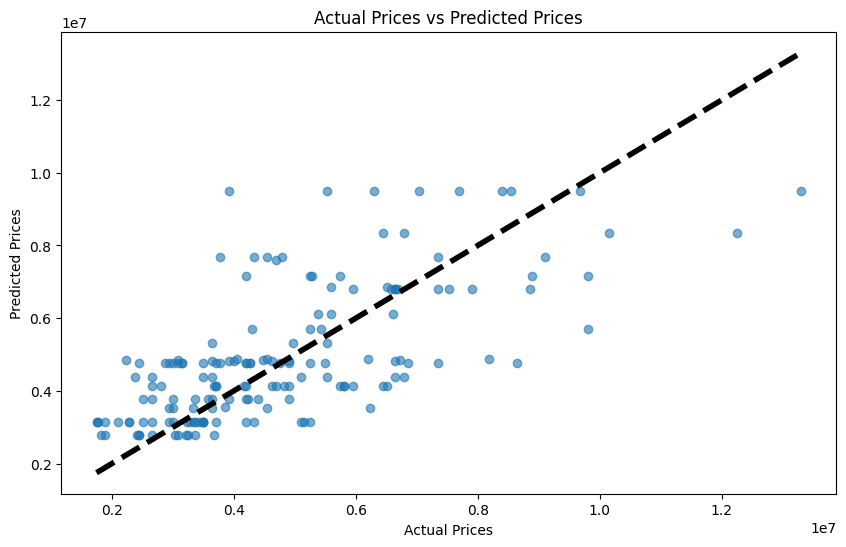

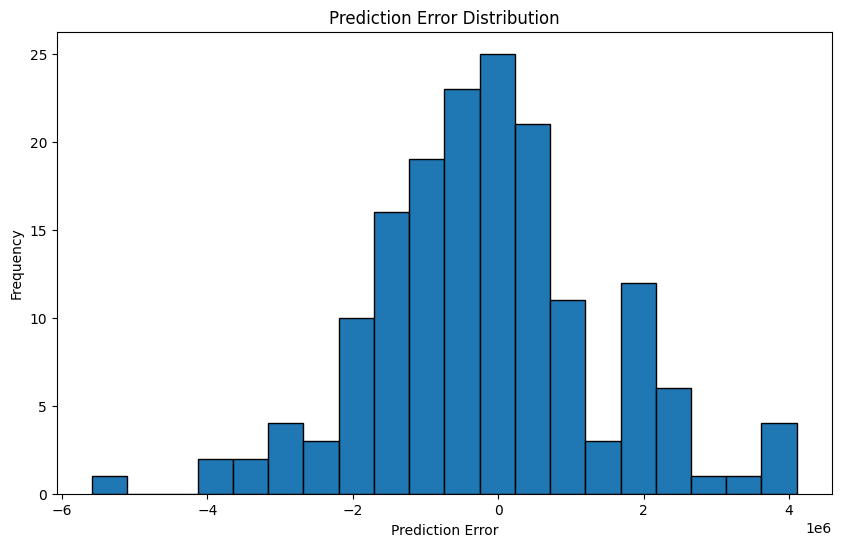

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

# Load your dataset
housing_df = pd.read_csv('Housing.csv')  # Replace with your file path

# Preprocess the dataset: Convert 'yes'/'no' to binary values and 'furnishingstatus' to categorical
housing_df['mainroad'] = housing_df['mainroad'].map({'yes': 1, 'no': 0})
housing_df['guestroom'] = housing_df['guestroom'].map({'yes': 1, 'no': 0})
housing_df['basement'] = housing_df['basement'].map({'yes': 1, 'no': 0})
housing_df['hotwaterheating'] = housing_df['hotwaterheating'].map({'yes': 1, 'no': 0})
housing_df['airconditioning'] = housing_df['airconditioning'].map({'yes': 1, 'no': 0})
housing_df['prefarea'] = housing_df['prefarea'].map({'yes': 1, 'no': 0})
housing_df = pd.get_dummies(housing_df, columns=['furnishingstatus'], drop_first=True)

# Selecting features and target variable
X = housing_df.drop('price', axis=1)  # All columns except 'price'
y = housing_df['price']  # Target variable


# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter grid
param_grid = {
    'max_depth': range(3, 20),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 20)
}

# Cross-validation and hyperparameter tuning
regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_regressor = grid_search.best_estimator_

# Predicting and evaluating with the best estimator
y_pred = best_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot Actual vs Predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

# Plotting the error distribution
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')
plt.show()

## Interpretation of Regression Tree Results

We trained a regression tree model to predict house prices, tuning the model with specific parameters for better performance. The best parameters obtained are as follows:

- **Max Depth:** 5
- **Minimum Samples per Leaf:** 5
- **Minimum Samples Split:** 12

These parameters were chosen to optimize the balance between model complexity and generalization ability.

### Performance Metrics

- **Mean Squared Error (MSE):** 2479984082435.897  
    MSE measures the average squared difference between the actual and predicted prices. A lower MSE indicates a better fit of the model to the data. In our case, the MSE is relatively high, suggesting that the model's predictions deviate considerably from the actual values.

- **R-squared:** 0.424115469228301  
    R-squared is the proportion of the variance in the dependent variable that is predictable from the independent variables. An R-squared of 0.424 implies that about 42.4% of the variance in house prices is explained by our model. While not negligible, this leaves a significant portion of the variance unexplained, indicating room for improvement in model performance.

### Conclusion

The results suggest that our regression tree model, with the chosen parameters, has moderate predictive power. The model explains a fair amount of variance in house prices, but the high MSE indicates that its predictions can be significantly off for some houses. Future work might focus on further parameter tuning, feature engineering, or exploring more complex models to improve predictions.
